## 1) Overview 
This project aims to develop a personalized movie recommendation system by leveraging a dataset containing movie information, user ratings, and interactions. The system will utilize content-based and collaborative filtering techniques to suggest movies to users based on their preferences and past interactions. 
 Modules for movie and user profiling will be developed to analyze movie attributes and user preferences, respectively. Evaluation and optimization will be conducted to enhance the accuracy
 Furthermore, leveraging movie metadata, user ratings, and collaborative filtering algorithms, the system provides personalized movie recommendations to enhance the user's movie-watching experience.


## 1.1)Introduction
- TMDB is a popular database that provides comprehensive information about movies,that contains the following titles, release dates, genres,cast and crew information. Credit information is given as well about the cast and crew information whereby the cast and crew are invoved in each movie. With the combination of the datasets, we gain valuable insights and perform variious analyses related to the movie industry

## 1.2) Problem Statement

- The movie industry is vast and fast evolving , with countless movies and movie sequels  released each year hence can be a challenge for the users to navigate through the vast amount of content and get to know which movies align with their preferences. 
- To ease this, or rather improve the users' experience, we come up withh a recommendation system that provides personalized movie recommendations based on user preferences and similarities with other users, and also aim to improve user satisfaction, increase user engagement, which ultimately drive user's retention on the platform.

## 1.3) Objectives

### 1.3.1) General  Objectives
- Develop a recommendation system that leverages user data and movie information to provide personalized movie recommendations.
Incorporate user preferences, including movie genres, ratings, and historical interactions, to generate relevant and engaging recommendations.
- Implement different recommendation techniques, such as collaborative filtering and content-based filtering, to ensure a diverse and accurate set of movie recommendations.
- To develop a movie recommendation system based on movie attributes, user ratings, and user interactions. The dataset consists of movie information such as title, cast, crew, budget, genres, keywords, language, revenue, and other relevant attributes. The objective is to leverage this data to build a recommendation system that can suggest movies to users based on their preferences and past interactions.

### 1.4 Data Understanding
 * Columns Understanding:

- id: Unique identifier for each movie
- title: Title of the movie
- cast: List of actors/actresses in the movie
- crew: List of crew members involved in the movie
- budget: Budget of the movie
- genres: List of genres associated with the movie
- homepage: Website URL of the movie
- keywords: List of keywords associated with the movie
- original_language: Original language of the movie
- original_title: Original title of the movie
- production_companies: List of production companies involved in the movie
- production_countries: List of countries where the movie was produced
- release_date: Release date of the movie
- revenue: Revenue generated by the movie
- runtime: Duration of the movie in minutes
- spoken_languages: List of languages spoken in the movie
- status: Current status of the movie (e.g., Released, Post Production)
- tagline: Tagline or slogan of the movie
- vote_average: Average vote rating for the movie
- vote_count: Number of votes received by the movie
- tags: List of tags associated with the movie

#### Import/ Load the libraries required

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_functions import DatasetInfo, movie_score, get_user_recommendations
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.*')

### Load the Datasets 
 >- Movie Credits Dataset 

In [3]:
tmdb_movie_credits = pd.read_csv("tmdb_credits.csv")
tmdb_movie_credits.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tmdb_credits.csv'

>-Movies Dataset

In [3]:
tmdb_movies = pd.read_csv("tmdb_movies.csv")
tmdb_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### Merge the Datasets
* To avoid overlapping of the tilte columns we drop because we already have the title in the movie dataset 

In [4]:
# Drop the Title column in Movies Dataset
tmdb_movies.drop(['title'], axis = 1, inplace = True )

In [5]:
# Identify the columns that are common and need to be merged 
tmdb_movie_credits.columns=['id', 'title', 'cast', 'crew']

In [6]:
# Merge the datasets
movies_credits = pd.merge(tmdb_movie_credits, tmdb_movies, on = 'id')
movies_credits.head(3)

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466


### Data Cleaning and Exploration

In this section, we create functions to explore the following characteristics of our dataset
- Info 
- Columns, Column Names
- Datatypes
- Statistcics 

In [8]:
data_info = DatasetInfo(movies_credits)
print(data_info)

In [9]:
data_info.check_dataset_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [10]:
data_info.check_dataset_shape()

Dataset shape: (4803, 22)


In [11]:
data_info.get_dataset_statistics_describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Checking for duplicates

In [12]:
movies_credits.duplicated().sum()

0

Checking for null values 

In [13]:
movies_credits.isnull().sum()

id                         0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64

Some columns within our dataset contain a list of dictionaries. In the cells below, we create functions to extract the desired attribute from each element in the columns.

In [24]:
# For the genres column we have to conevrt it but firts we have to implement 
movies_credits.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [14]:
movies_credits['genres']=movies_credits['genres'].apply(data_info.convert)

movies_credits['keywords']=movies_credits['keywords'].apply(data_info.convert)

movies_credits['production_companies']=movies_credits['production_companies'].apply(data_info.convert)

movies_credits['cast']=movies_credits['cast'].apply(data_info.convert3)

movies_credits['crew']=movies_credits['crew'].apply(data_info.get_directors)

In the cell below, we split the text in the `overview` column into a list of words for each row where the value is a string. For rows where the value is not a string, it assigns `np.nan` to indicate a missing value.

In [15]:
movies_credits['overview'] = movies_credits['overview'].apply(lambda x: x.split() if isinstance(x, str) else np.nan)

The code below applies a lambda function to iterate over each element `i` in the input list `x`. It replaces any occurrence of whitespace (" ") in each element with an empty string, effectively removing any spaces.

In [16]:
# Remove spaces from the elements in the 'genres' column
movies_credits['genres'] = movies_credits['genres'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'keywords' column
movies_credits['keywords'] = movies_credits['keywords'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'crew' column
movies_credits['crew'] = movies_credits['crew'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'cast' column
movies_credits['cast'] = movies_credits['cast'].apply(lambda x: [i.replace(" ","") for i in x])

Concatenating the modified columns into one named `tags`

In [19]:
movies_credits['tags'] = movies_credits['overview'] + movies_credits['genres'] + movies_credits['keywords'] + movies_credits['cast'] + movies_credits['crew']

In [20]:
# Previewing our dataset to confirm changes
movies_credits.head(3)

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,tags
0,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[A, cryptic, message, from, Bond’s, past, send..."


## 3) EDA:
## Visualization

I. **Univariate Analysis**

* Vote Count

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64


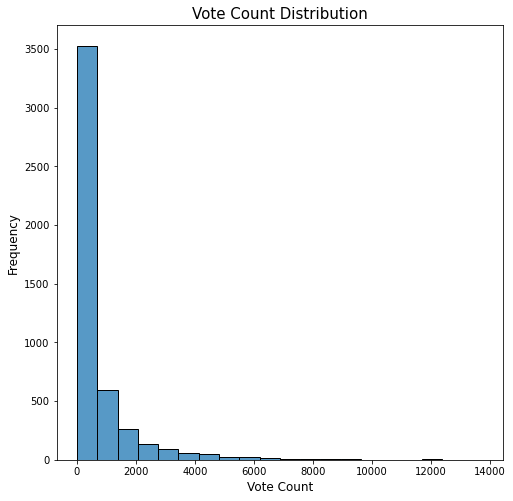

In [58]:
# Vote Count description
vote_count_univariate = movies_credits['vote_count'].describe()
print(vote_count_univariate)

# Plot vote count distribution
plt.figure(figsize=(8, 8))
sns.histplot(movies_credits['vote_count'], kde = False , bins = 20)
plt.xlabel("Vote Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Count Distribution", fontsize=15)
plt.show()

From the plot above we can determine that the vote count decreases hence a low concentarationtion for the vote counts 

* Vote Average

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64


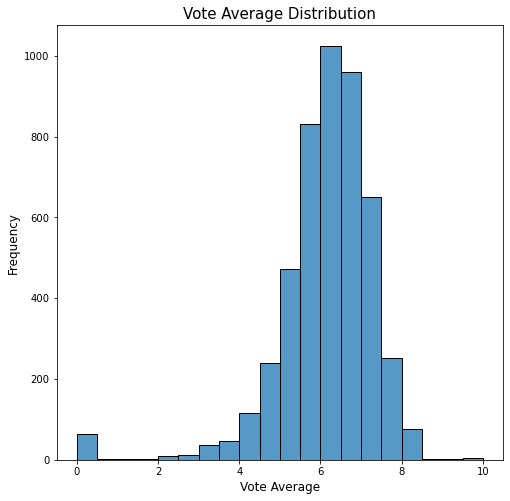

In [57]:
vote_average_univariate = movies_credits['vote_average'].describe()
print(vote_average_univariate)

# Plot the vote average distribution
plt.figure(figsize=(8, 8))
sns.histplot(movies_credits['vote_average'], kde = False , bins = 20)
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Average Distribution", fontsize=15)
plt.show()

The vote average is normallly distributed with the majority of it being 6-8. 

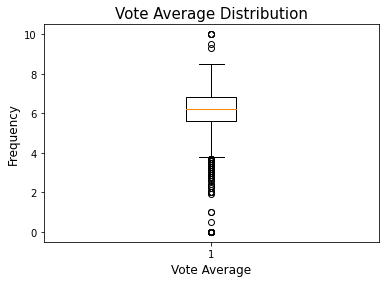

In [59]:
# Checking for outliers in the 'vote average' column
plt.boxplot(movies_credits['vote_average'])
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Average Distribution", fontsize=15)
plt.show()

There are outliers from 0-4 and 8-10, hence we remove them 

In [60]:
# Define the lower and upper bounds for the outliers
lower_bound = 0
upper_bound = 4

# Remove outliers from the 'vote_average' column
movies_credits_filtered = movies_credits[(movies_credits['vote_average'] >= lower_bound) & (movies_credits['vote_average'] <= upper_bound)]

# Display the filtered dataset without outliers
print(movies_credits_filtered.head())

        id                                 title  \
272  24113                        Town & Country   
309  10214                       Son of the Mask   
480   5491                     Battlefield Earth   
503  17711  The Adventures of Rocky & Bullwinkle   
601  11535                            Rollerball   

                                            cast                crew  \
272      [WarrenBeatty, DianeKeaton, GoldieHawn]      [PeterChelsom]   
309   [JamieKennedy, AlanCumming, TraylorHoward]  [LawrenceGuterman]   
480  [JohnTravolta, BarryPepper, ForestWhitaker]    [RogerChristian]   
503     [ReneRusso, JasonAlexander, PiperPerabo]        [DesMcAnuff]   
601         [ChrisKlein, LLCoolJ, RebeccaRomijn]     [JohnMcTiernan]   

       budget                                          genres homepage  \
272  90000000                               [Comedy, Romance]      NaN   
309  84000000            [Fantasy, Comedy, Family, Adventure]      NaN   
480  44000000                   

* Keywords

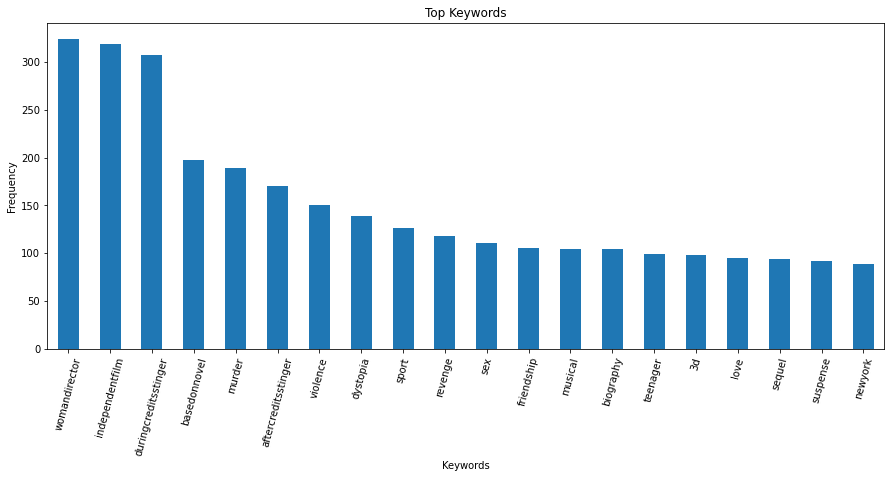

In [50]:
# Extract the 'keywords' column
keywords = movies_credits['keywords']

# Flatten the list of keywords
flat_keywords = [keyword for sublist in keywords for keyword in sublist]

# Count the frequency of each keyword
keyword_counts = pd.Series(flat_keywords).value_counts()

# Select the top keywords
top_keywords = keyword_counts.head(20) 

# Plot the top keywords
plt.figure(figsize=(15, 6))
top_keywords.plot(kind='bar')
plt.title('Top Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
plt.show()

* Genres

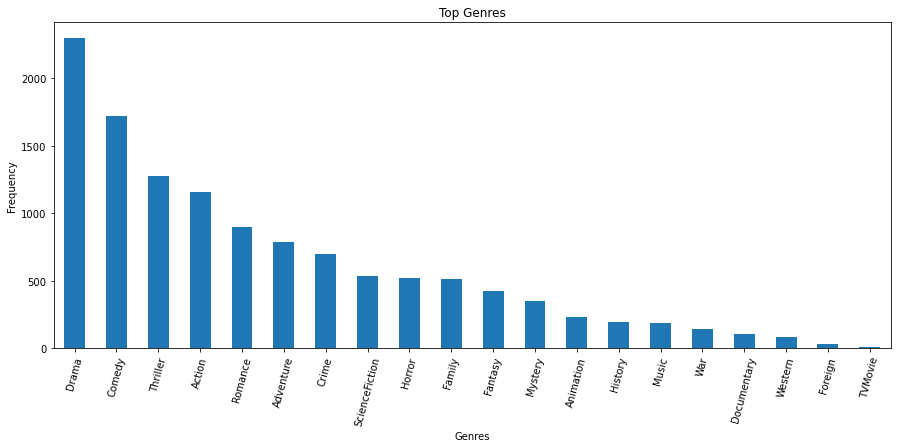

In [52]:
# Extract the 'genres' column
genres = movies_credits['genres']

# Flatten the list of genres
flat_genres = [genre for sublist in genres for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(flat_genres).value_counts()

# Select the top genres
top_genres = genre_counts.head(20)

# Plot the top genres
plt.figure(figsize=(15, 6))
top_genres.plot(kind='bar')
plt.title('Top Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
plt.show()

In [288]:
print(movies_credits_filtered['vote_average'].describe())

count    185.000000
mean       2.163243
std        1.650280
min        0.000000
25%        0.000000
50%        3.000000
75%        3.600000
max        4.000000
Name: vote_average, dtype: float64


* Spoken Languages

c:\Users\Cheko\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Cheko\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Cheko\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Cheko\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Cheko\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Cheko\anaconda3\envs\learn-env\lib\site-p

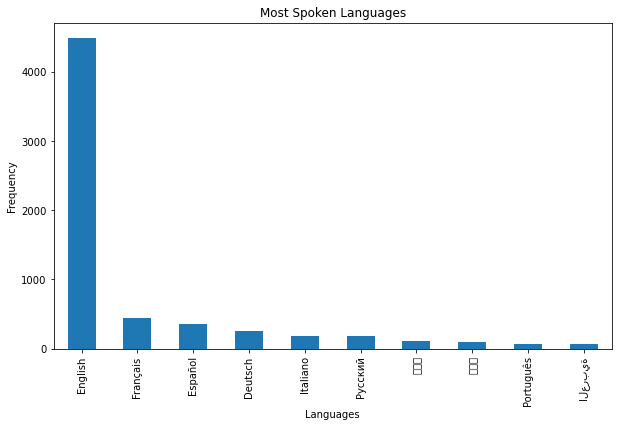

In [70]:
# Extract the 'spoken_languages' column
spoken_languages = movies_credits['spoken_languages']

# Flatten the list of spoken languages
flat_languages = []
for sublist in spoken_languages:
    if isinstance(sublist, str):
        sublist = ast.literal_eval(sublist)
    for language in sublist:
        if isinstance(language, dict):
            flat_languages.append(language['name'])

# Count the frequency of each spoken language
language_counts = pd.Series(flat_languages).value_counts()

# Select the top spoken languages
top_languages = language_counts.head(10)  # Change the number to select more or fewer top languages

# Plot the top spoken languages
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar')
plt.title('Most Spoken Languages')
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.show()

* Movie Status

In [72]:
movies_credits['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

* Production Companies

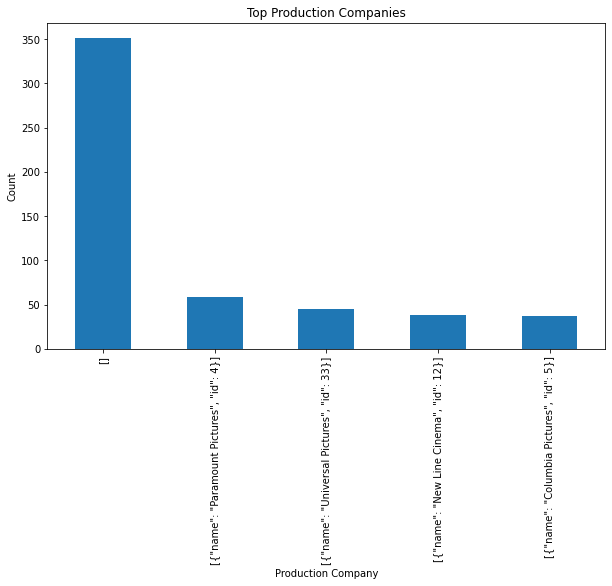

In [79]:
# Get value counts of production companies
production_company_counts = movies_credits['production_companies'].value_counts()

# Select the top 5 production companies
top_production_companies = production_company_counts[:5]

# Plot the top production companies
plt.figure(figsize=(10, 6))
top_production_companies.plot(kind='bar')
plt.title('Top Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Count')
plt.show()

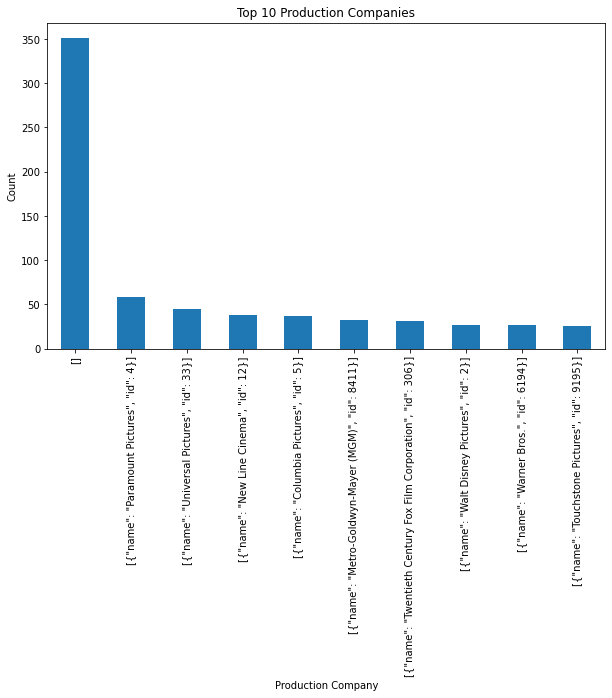

In [78]:
# Plotting 'production_companies' (top 10)
plt.figure(figsize=(10, 6))
top_10_production_companies = movies_credits['production_companies'].explode().value_counts().head(10)
top_10_production_companies.plot(kind='bar')
plt.title('Top 10 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Count')
plt.show()

II. **Bivariate Analysis**

* Original Title vs Popularity

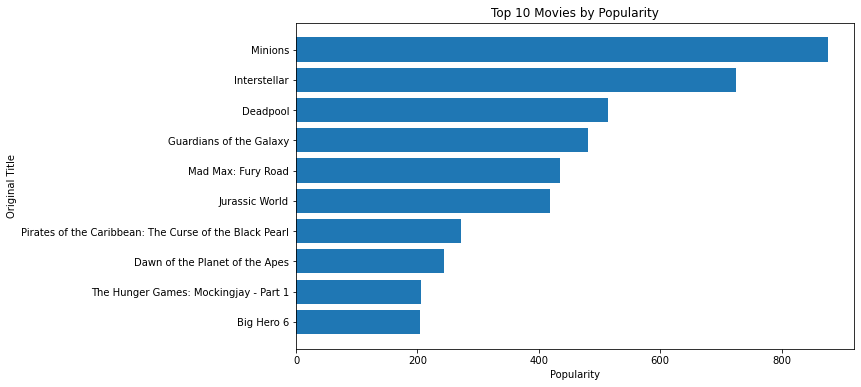

In [73]:
# Plotting 'original_title'against popularity (top 10 movies)
plt.figure(figsize=(10, 6))
top_10_movies = movies_credits.sort_values('popularity', ascending=False).head(10)
plt.barh(top_10_movies['original_title'], top_10_movies['popularity'])
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Original Title')
plt.gca().invert_yaxis()
plt.show()

* Popularity vs Revenue

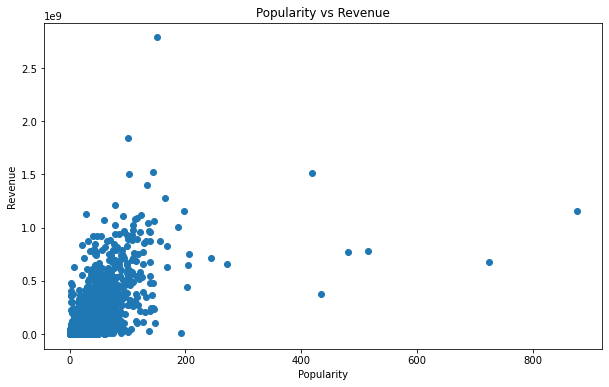

In [74]:
# Plotting 'popularity' vs 'revenue'
plt.figure(figsize=(10, 6))
plt.scatter(movies_credits['popularity'], movies_credits['revenue'])
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

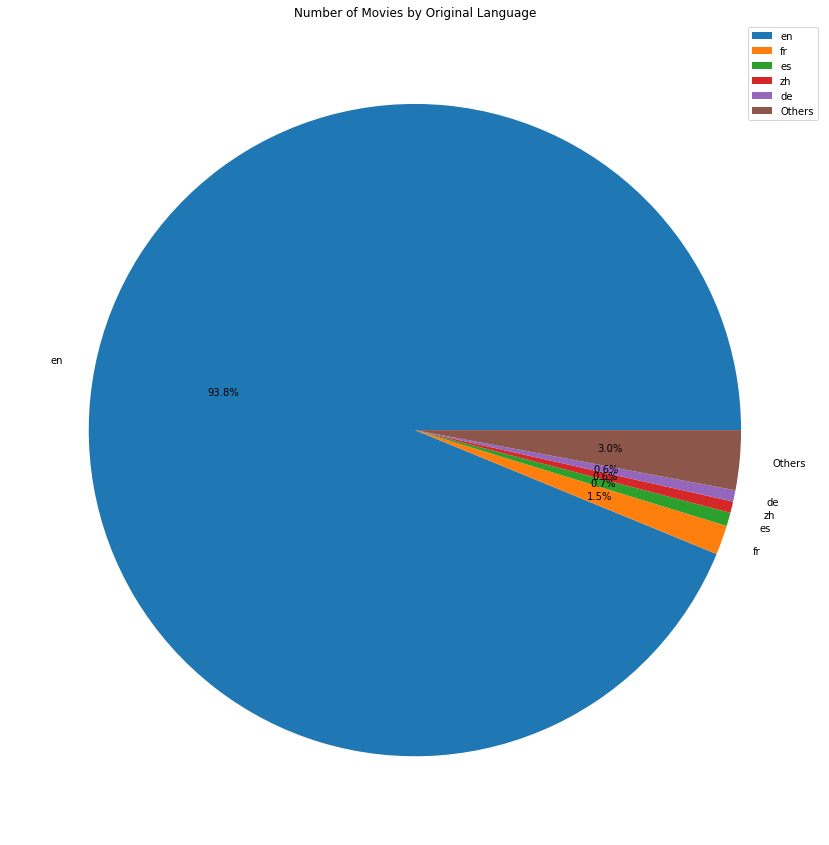

In [77]:
 #Get value counts of original languages
original_language_counts = movies_credits['original_language'].value_counts()

# Get the top 5 languages
top_languages = original_language_counts[:5]

# Calculate the count for the "Others" category
others_count = original_language_counts[5:].sum()

# Create a new series with the top 5 languages and "Others"
languages_data = top_languages.append(pd.Series(others_count, index=['Others']))

# Plotting 'original_language'
plt.figure(figsize=(15, 15))
languages_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Movies by Original Language')
plt.ylabel('')

# Add labels to the pie chart
plt.legend(labels=languages_data.index)

plt.show()

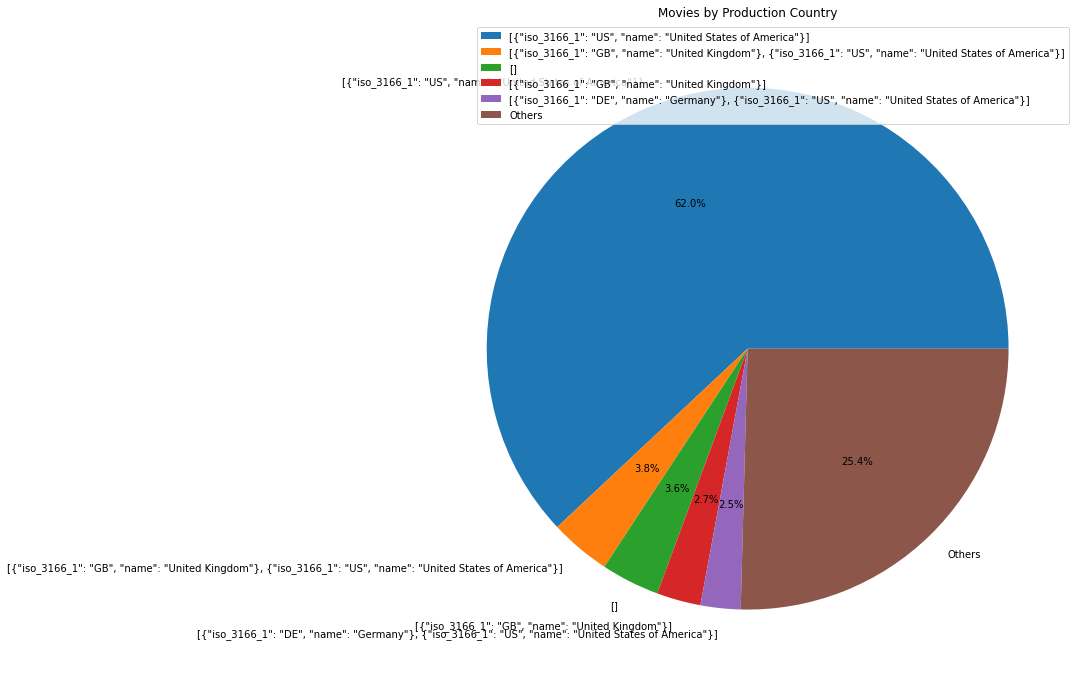

In [ ]:
# Get value counts of production countries
production_countries_counts = movies_credits['production_countries'].explode().value_counts()

# Get the top five production countries
top_countries = production_countries_counts[:5]

# Calculate the count for the sixth slice ("others")
others_count = production_countries_counts[5:].sum()

# Create a new series with the top five countries and "others"
countries_data = top_countries.append(pd.Series(others_count, index=['Others']))

# Plotting 'production_countries'
plt.figure(figsize=(20, 12))
countries_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Movies by Production Country')
plt.ylabel('')

# Labeling the countries
plt.legend(labels=countries_data.index, loc='best')
plt.show()


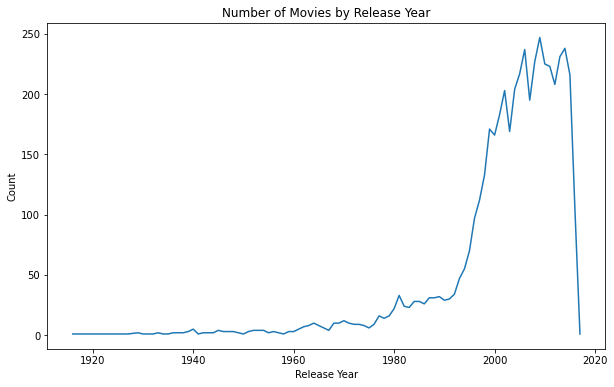

In [ ]:
# Plotting 'release_date' (yearly distribution)
movies_credits['release_year'] = pd.to_datetime(movies_credits['release_date']).dt.year

plt.figure(figsize=(10, 6))
movies_credits['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


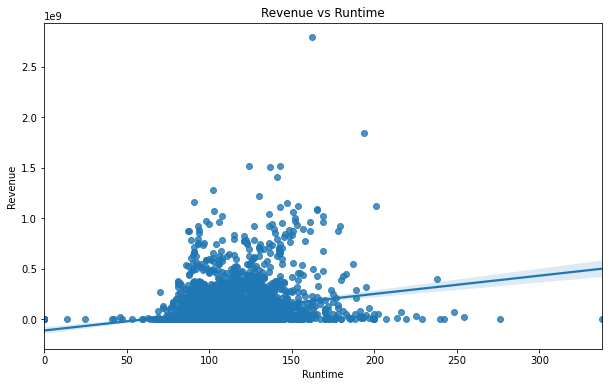

In [ ]:
# Plotting 'revenue' and 'runtime' (scatter plot with regression line)
plt.figure(figsize=(10, 6))
sns.regplot(x='runtime', y='revenue', data=movies_credits)
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

## Recommendation System 

####  i ) Demographic Recommendation based on Popularity 

##### Sort The movie/credits based on ratings and display the top movies: Improve accuracy of the recommendations 
- Create a metric to score or rate the movies.
- Calculate the score for each movie.
- Sort the scores and recommend the highest-rated movie to the users.

Implement the following Formula 

Weighted Rating (WR) = (vv+m.R) / (v+m)

Where:

v is the number of votes for the movie.
m is the minimum votes required to be listed in the chart.
R is the average rating of the movie.

In [ ]:
movies_credits['vote_average'].mean()

6.092171559442016

In [ ]:
# Determine the appropriate value of M
movies_credits['vote_count'].quantile(q=0.9)

1838.4000000000015

In [ ]:
# Filter and put them in a new dataframe
new_dataframe_filtered=movies_credits[movies_credits['vote_count']>movies_credits['vote_count'].quantile(q=0.9)]

In [ ]:
# Check the shape of the new dataframe
new_dataframe_filtered.shape

(481, 23)

In [ ]:
# Calculate score for each qualified movie
def movie_score(x):
    v=x['vote_count']
    m=movies_credits['vote_count'].quantile(q=0.9)
    R=x['vote_average']
    C=movies_credits['vote_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [ ]:
new_dataframe_filtered['score'] = new_dataframe_filtered.apply(movie_score, axis=1).copy()


<ipython-input-217-cb527756d9a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe_filtered['score'] = new_dataframe_filtered.apply(movie_score, axis=1).copy()


* The warning above is raised when you are trying to set a  value on a copy of a slice from the Pandas Dataframe
* As such we have .loc explicitly and one can set the values in the 'score column for the rows of the new dataframe 

In [ ]:
# We  solve the above warning by using the '.loc and set the new values
new_dataframe_filtered.loc[:, 'score'] = new_dataframe_filtered.apply(movie_score, axis=1)


c:\Users\wanji\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# We sort the filtered dataframe based on the score feature
new_highscore=new_dataframe_filtered.sort_values(by='score', ascending=False).head()
new_highscore[['title', 'vote_count','vote_average','popularity', 'score']]

,title,vote_count,vote_average,popularity,score
1881,The Shawshank Redemption,8205,8.5,136.747729,8.059258
662,Fight Club,9413,8.3,146.757391,7.939256
65,The Dark Knight,12002,8.2,187.322927,7.920020
3232,Pulp Fiction,8428,8.3,121.463076,7.904645
96,Inception,13752,8.1,167.583710,7.863239


####  Finding movie popularity 

In [ ]:
# Sort by the popularity column
popular_movies = movies_credits.sort_values('popularity', ascending = False).head()
popular_movies[['title', 'vote_count','vote_average','popularity']]

,title,vote_count,vote_average,popularity
546,Minions,4571,6.4,875.581305
95,Interstellar,10867,8.1,724.247784
788,Deadpool,10995,7.4,514.569956
94,Guardians of the Galaxy,9742,7.9,481.098624
127,Mad Max: Fury Road,9427,7.2,434.278564


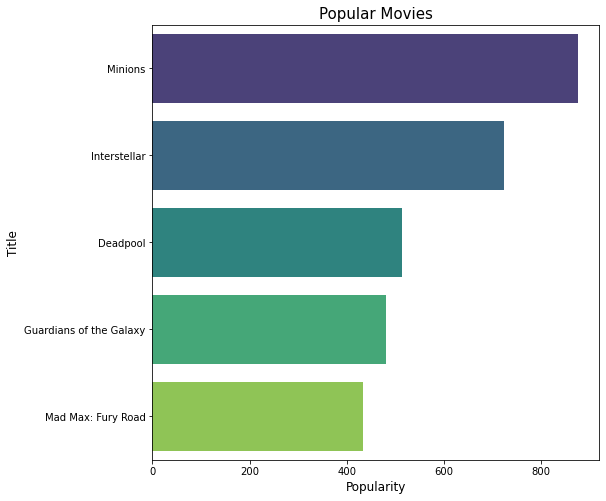

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x='popularity', y='title', data=popular_movies, palette='viridis')
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Title", fontsize=12)
plt.title("Popular Movies", fontsize=15)
plt.show()



* From the plot above we can see that the most popular movie is minions with a popularity rate of > 800; hence being highly recommended to be watched by the user/ rather recommend users to watch

In [ ]:
movie_rating= pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\ratings.csv")
movie_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Step 1: Calculate values for the formula
v = movies_credits['vote_count']
R = movies_credits['vote_average']
m = 1000  # Choose a minimum vote threshold

# Step 2: Compute weighted rating (WR)
C = movies_credits['vote_average'].mean()
WR = (v / (v + m) * R) + (m / (v + m) * C)

# Step 3: Add 'Weighted_Rating' column to DataFrame
movies_credits['Weighted_Rating'] = WR

# Step 4: Sort the DataFrame based on 'Weighted_Rating' column
sorted_movies = movies_credits.sort_values('Weighted_Rating', ascending=False)

# Step 5: Display top movies based on sorted results
top_movies = sorted_movies[['title', 'vote_average','genres', 'Weighted_Rating']].head(10)
top_movies

,title,vote_average,genres,Weighted_Rating
1881,The Shawshank Redemption,8.5,"[Drama, Crime]",8.238422
662,Fight Club,8.3,[Drama],8.087974
3232,Pulp Fiction,8.3,"[Thriller, Crime]",8.065822
3337,The Godfather,8.4,"[Drama, Crime]",8.065192
65,The Dark Knight,8.2,"[Drama, Action, Crime, Thriller]",8.037884
96,Inception,8.1,"[Action, Thriller, ScienceFiction, Mystery, Ad...",7.963894
809,Forrest Gump,8.2,"[Comedy, Drama, Romance]",7.963882
95,Interstellar,8.1,"[Adventure, Drama, ScienceFiction]",7.930806
1990,The Empire Strikes Back,8.2,"[Adventure, Action, ScienceFiction]",7.893585
1818,Schindler's List,8.3,"[Drama, History, War]",7.885696


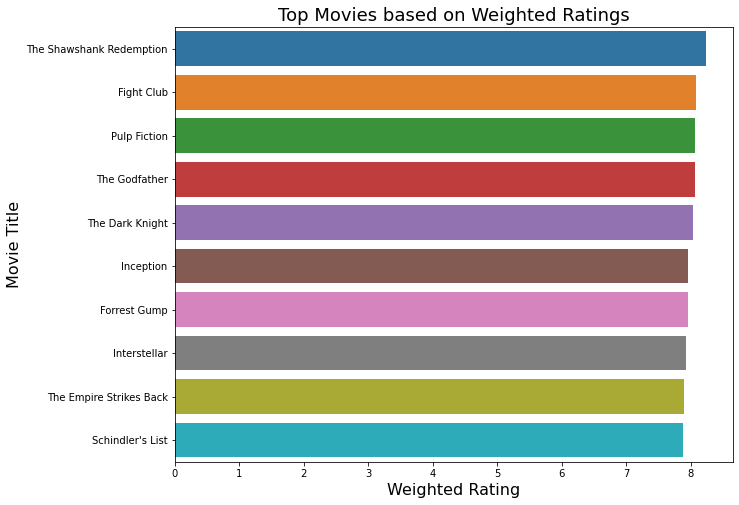

In [ ]:
# Step 6: Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=top_movies['Weighted_Rating'], y=top_movies['title'], ax=ax)
ax.set_xlabel('Weighted Rating', fontsize=16)
ax.set_ylabel('Movie Title', fontsize=16)
ax.set_title('Top Movies based on Weighted Ratings', fontsize=18)

plt.show()

## ii) Content Based

> For this recommendation system we build an engine that shows the similarity between movie based and the metrics new_dataframe_filtered.
> Secondly, this will be in two segments :
* Movie Overview
* Movie Cast , Keywords and Genre

* 1.ii)Movie Overview Recommendation
- We use this because provides a concise description of its storyline, theme, and main elements. It offers insights into the narrative and helps to understand the central idea or premise of the movie.
> We pair the similar scores of the movies based on the overview 

In [ ]:
movies_credits ['overview'].head()

# Finding the Nan values(missing values) with an empty string 

movies_credits['overview'].isnull().sum()# We know there 3 missing values hence we replace them

# Replacing the missing values
movies_credits['overview'].fillna('', inplace = True)

In [ ]:
# Confirm if there are Missing values
movies_credits['overview'].isnull().sum()

0

In [ ]:
# Convert the 'overview' column to string type
movies_credits['overview'] = movies_credits['overview'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

##### In this case we implement the use of 'Term frequency-Inverse Documnet Frequency which is a numerical representation used to evaluate the key importance of the collection of documents. 
* It calculates the ratio of the number of times a term appears in a text

In [ ]:
movie_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
# Construct the TF-IDF Matrix
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix=tfidfv.fit_transform(movies_credits['overview'])
print(tfidfv_matrix.todense())
tfidfv_matrix.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(4803, 20978)

####  Computing the same Score based on the movie Similiarities


In [ ]:
# In this case,  we 

## iii)  Collaborative Based Recommendation 

In [ ]:
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate